In [34]:
n = 6
m = 10
k = 3 # 3-SAT
ret_num = 3

In [35]:
from benchmark.weighted_problem import WeightedProblem
problem = WeightedProblem(n, m, k)

In [36]:
for (c, w) in problem.formula.weighted_clauses:
    print(f'Clause: {c}, weight: {w}')

Clause: (¬x2 ∨ ¬x5 ∨ x5), weight: 7.535349573116652
Clause: (¬x0 ∨ x1 ∨ x4), weight: 9.75234683528599
Clause: (x3 ∨ x2 ∨ ¬x1), weight: 2.4214007615940494
Clause: (¬x3 ∨ x0 ∨ ¬x4), weight: 3.687459328861109
Clause: (x3 ∨ ¬x2 ∨ ¬x3), weight: 9.873112417647304
Clause: (x1 ∨ ¬x1 ∨ x4), weight: 9.00868231171016
Clause: (x0 ∨ ¬x4 ∨ x2), weight: 2.7971644712999213
Clause: (¬x2 ∨ ¬x1 ∨ x3), weight: 2.90816843377708
Clause: (x4 ∨ ¬x0 ∨ x5), weight: 4.456727661304939
Clause: (¬x4 ∨ x1 ∨ ¬x5), weight: 1.282223949377811


In [37]:
from max_3_sat.quantum_solver import QuantumSolver

quantum_solver = QuantumSolver(problem.formula)
q_max_sats = quantum_solver.max_sat(ret_num=ret_num)


In [38]:
q_max_sats

{'111001': 50.814467310197934,
 '011000': 50.814467310197934,
 '011001': 50.814467310197934}

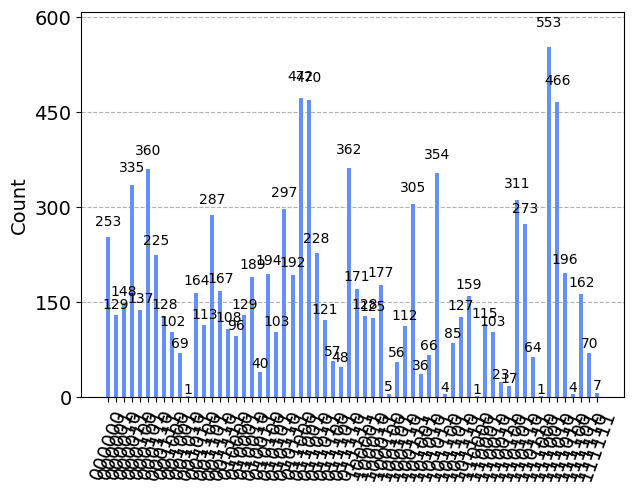

In [39]:
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

plot_histogram(quantum_solver.circuit_result)

In [40]:
from max_3_sat.classical_solver import ClassicalSolver

classical_solver = ClassicalSolver(problem.formula.to_pysat(), weight_func = problem.formula.assignment_weight)
c_max_sats = classical_solver.max_sat(ret_num=ret_num)


In [41]:
c_max_sats

{'000000': 53.72263574397501,
 '001000': 53.72263574397501,
 '001100': 53.72263574397501}

In [42]:
ratio = list(q_max_sats.values())[0] / list(c_max_sats.values())[0]
ratio

0.9458669815152688

[]

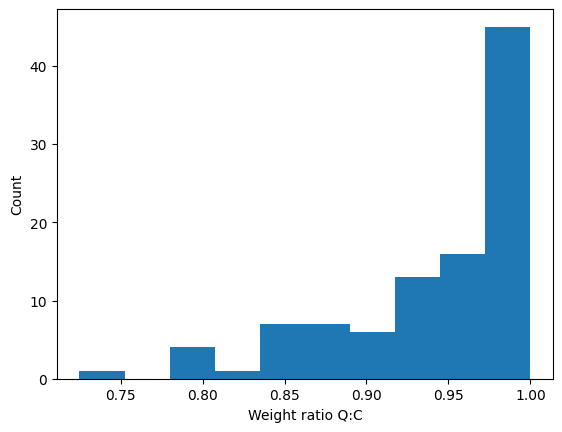

In [43]:
num_variables = 7
num_clauses = 10
vars_per_clause = 3

ratios = []

for _ in range(100):
    # Randomly generated problem instance
    problem = WeightedProblem(num_variables, num_clauses, vars_per_clause)

    # Initialise solvers
    quantum_solver = QuantumSolver(problem.formula)
    classical_solver = ClassicalSolver(problem.formula.to_pysat(), weight_func = problem.formula.assignment_weight)

    # Calculate ratio between solutions
    ratios.append(problem.weight_ratio(quantum_solver, classical_solver))

# Plot
plt.hist(ratios)
plt.xlabel("Weight ratio Q:C")
plt.ylabel("Count")
plt.plot()


[]

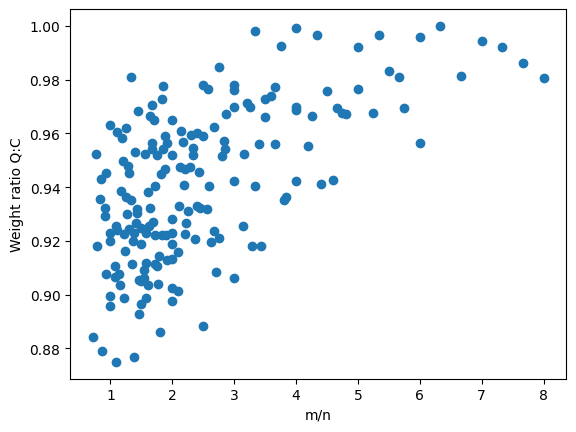

In [29]:
k = 3
instances = 10

# Benchmark over 3 to 15 variable instances
for n in range(3, 15):
    # Benchmark over 10 to 25 clause instances
    for m in range(10, 25):
        print(f'n={n}, m={m}')
        # Generate random instances
        ratio = 0
        for i in range(instances):
            # Randomly generated problem instance
            problem = WeightedProblem(n, m, k)

            # Initialise solvers
            quantum_solver = QuantumSolver(problem.formula)
            classical_solver = ClassicalSolver(problem.formula.to_pysat(), weight_func =            
            problem.formula.assignment_weight)

            # Update ratio
            ratio += problem.weight_ratio(quantum_solver, classical_solver)

        # Calculate ratio between solutions
        plt.scatter(x = m / n, y = ratio / instances, c='#1f77b4')

plt.xlabel("m/n")
plt.ylabel("Weight ratio Q:C")
plt.plot()
            